In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [7]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(f'X_train size: {len(X_train)}', end=', ')
print(f'X_test size: {len(X_test)}')
print(f'y_train size: {len(y_train)}', end=', ')
print(f'y_test size: {len(y_test)}')

X_train size: 3500, X_test size: 1500
y_train size: 3500, y_test size: 1500


In [112]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
logistic_model = LogisticRegression().fit(X_train_scaled, y_train)

In [114]:
y_pred = logistic_model.predict(X_test_scaled)

In [115]:
accuracy_score(y_test, y_pred)

0.9206666666666666

In [116]:
confusion_matrix(y_test, y_pred)

array([[515,  82],
       [ 37, 866]], dtype=int64)

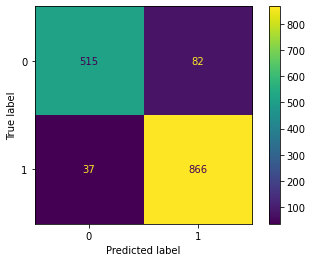

In [117]:
plot_confusion_matrix(
    estimator=logistic_model,
    X=X_test_scaled,
    y_true=y_test
);

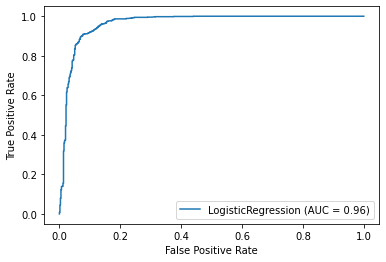

In [118]:
plot_roc_curve(
    estimator=logistic_model,
    X=X_test_scaled,
    y=y_test
);

In [120]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       597
           1       0.91      0.96      0.94       903

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.92      1500
weighted avg       0.92      0.92      0.92      1500



In [121]:
final_logistic_model = LogisticRegression().fit(X, y)

In [122]:
y_hat = final_logistic_model.predict(X)

In [123]:
accuracy_score(y_true=y, y_pred=y_hat)

0.9152

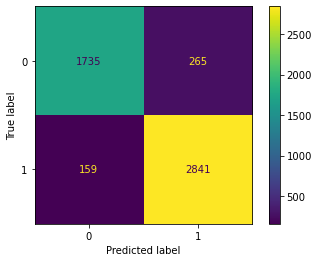

In [124]:
plot_confusion_matrix(
    estimator=final_logistic_model,
    X=X,
    y_true=y
);

In [125]:
print(classification_report(y_true=y, y_pred=y_hat))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2000
           1       0.91      0.95      0.93      3000

    accuracy                           0.92      5000
   macro avg       0.92      0.91      0.91      5000
weighted avg       0.92      0.92      0.91      5000

